## Interpolating octahedral GRIB data

This example shows how to interpolate GRIB data on an octahedral reduced Gaussian grid. We will aslo see how to inspect and plot the resulting data and how to convert it to xarray.

To make this notebook work **earthkit.data** and **earthkit.maps** have to be installed. The data will be represented as a [earthkit-data GRIB FieldList](https://earthkit-data.readthedocs.io/en/latest/guide/data_format/grib.html).

In [1]:
from earthkit.regrid import interpolate
from earthkit.data import from_source, FieldList

# Get octahedral reduced Gaussian GRIB data containing two fields.
ds = from_source(
    "url", 
    "https://get.ecmwf.int/repository/test-data/earthkit-regrid/examples/O32_multi.grib")

# the target grid is a global 1x1 degree regular latitude grid
target_gridspec = {"grid": [1,1]}

r = FieldList()
for f in ds:
    v_res = interpolate(f.to_numpy(flatten=True), f.metadata().gridspec, target_gridspec)
    md_res = f.metadata().override(gridspec=target_gridspec)
    r += ds.from_numpy(v_res, md_res)

d = r.data()
lat = d[0]
lon = d[1]
vals = d[2:]
lat.shape, lon.shape, vals.shape

((181, 360), (181, 360), (2, 181, 360))

In [8]:
lat[:3, 0], lon[:3, 0], vals[0, :3, 0]

(array([90., 89., 88.]),
 array([0., 0., 0.]),
 array([252.1920929 , 248.53096008, 248.53096008]))

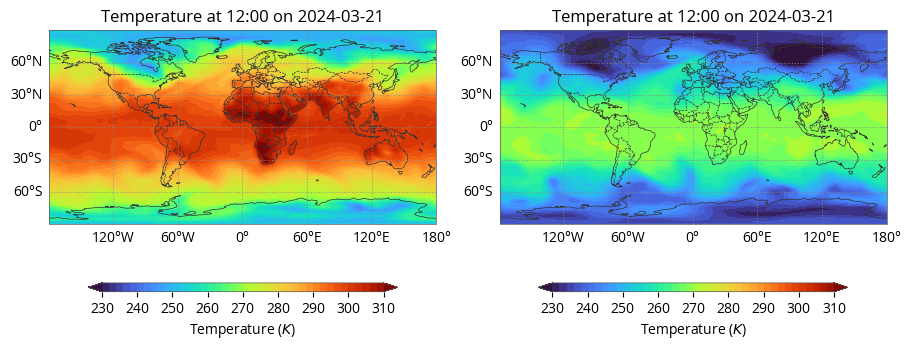

In [2]:
import earthkit.maps
earthkit.maps.quickplot(r)

In [3]:
r.to_xarray()

<xarray.Dataset>
Dimensions:        (number: 1, time: 1, step: 1, isobaricInhPa: 2,
                    latitude: 181, longitude: 360)
Coordinates:
  * number         (number) int64 0
  * time           (time) datetime64[ns] 2024-03-21T12:00:00
  * step           (step) timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 500.0
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
    valid_time     (time, step) datetime64[ns] ...
Data variables:
    t              (number, time, step, isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-03-24T15:36 GRIB to CDM+CF via cfgrib-0.9.1...